In [1]:
%matplotlib inline

import os

import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import geopandas as gpd
import pandas as pd
import psycopg2


plt.style.use("ggplot")
conn_string = os.environ["DATABASE_CONNECTION"]
conn = psycopg2.connect(conn_string)

practices = pd.read_sql("SELECT * FROM practices ORDER BY program", conn)
huc8 = gpd.read_postgis("SELECT * FROM huc8", conn, "geometry")

In [2]:
practices

,id,huc_8,huc_12,state,county_code,county,nrcs_practice_code,practice_name,program,fund_code,...,category,wq_benefits,area_treated,ancillary_benefits,p_reduction_fraction,n_reduction_fraction,p_reduction_percentage_statewide,n_reduction_percentage_statewide,p_reduction_gom_lbs,n_reduction_gom_lbs
0,8474,08050001,080500010703,Louisiana,None,MOREHOUSE,WQL06,Apply controlled release nitrogen fertilizer,CSP,None,...,In-Field,N,2275.90,[],0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
1,8468,08050001,080500011705,Louisiana,None,FRANKLIN,WQL06,Apply controlled release nitrogen fertilizer,CSP,None,...,In-Field,N,71.00,[],0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
2,8469,08020303,080203030207,Arkansas,None,ARKANSAS,WQL06,Apply controlled release nitrogen fertilizer,CSP,None,...,In-Field,N,251.00,[],0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
3,8470,04030101,040301011106,Wisconsin,None,CALUMET,WQL06,Apply controlled release nitrogen fertilizer,CSP,None,...,In-Field,N,40.00,[],0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
4,8471,08020401,080204010202,Arkansas,None,JEFFERSON,WQL06,Apply controlled release nitrogen fertilizer,CSP,None,...,In-Field,N,357.00,[],0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242970,110067,08040205,080402050505,Arkansas,05043,DREW,561,Heavy Use Area Protection,EQIP,Pasture - Drew,...,In-Field,N & P,0.50,"[Livestock Health, Social]",7.378534e-11,1.205558e-10,9.837009e-10,2.225761e-09,0.010486,0.197215
242971,85169,05100101,051001010904,Kentucky,21069,FLEMING,512,Forage & Biomass Planting (Ac),EQIP,CCPI-MRBI-Kentucky Division of Conservation-Li...,...,In-Field,N & P,4.00,"[Livestock Health, Habitat, Soil Health]",0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
242972,110068,11010001,110100010403,Arkansas,05143,WASHINGTON,561,Heavy Use Area Protection,EQIP,"Pasture - (Plant Condition, Inadequate habitat)",...,In-Field,N & P,0.02,"[Livestock Health, Social]",5.159917e-12,6.788388e-12,6.879165e-11,1.253307e-10,0.000733,0.011105
242973,85170,05140101,051401010103,Kentucky,21223,TRIMBLE,512,Forage & Biomass Planting (Ac),EQIP,PA 6 Eagle Pastureland,...,In-Field,N & P,28.40,"[Livestock Health, Habitat, Soil Health]",0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000


Text(0, 0.5, 'Count')

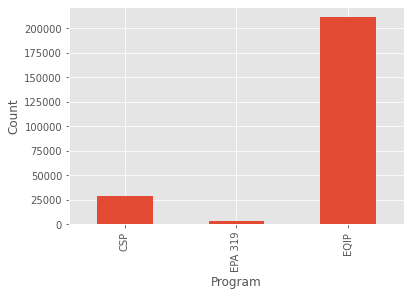

In [3]:
ax = practices["program"].value_counts(sort=False).plot(kind="bar")
ax.set_xlabel("Program")
ax.set_ylabel("Count")

Text(0, 0.5, 'Count')

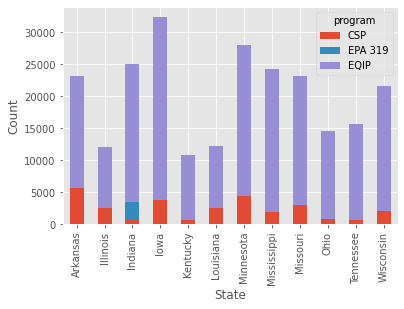

In [4]:
ax = practices.groupby(["state", "program"]).size().unstack().plot(kind="bar", stacked=True)
ax.set_xlabel("State")
ax.set_ylabel("Count")

Text(0, 0.5, 'Funding')

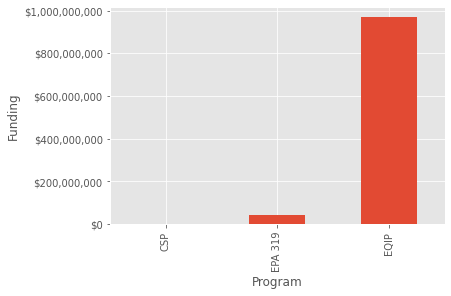

In [5]:
programs = practices.groupby("program")
ax = programs.sum()["funding"].plot(kind="bar")
ax.get_yaxis().set_major_formatter(mtick.FuncFormatter(lambda x, p: f"${int(x):,}"))
ax.set_xlabel("Program")
ax.set_ylabel("Funding")